# Imports

In [1]:
from pyabc import (ABCSMC, Distribution, RV,
                   History, Model,
                   ModelResult, MedianEpsilon)
from pyabc.transition import MultivariateNormalTransition
from pyabc.visualization import plot_kde_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Inline.Backend.figure_format = 'retina'
import os
import tempfile
import math
import pandas as pd
import scipy as sp
import numpy as np
import subprocess
from io import BytesIO

from pyabc_custom import MyokitSimulation
from prangle_distance import PrangleDistance,PranglePopulationSize,PrangleEpsilon

# Get experimental measurements

In [2]:
myokit_python = ("/tmp/chouston/miniconda3/envs" +
                 "/ion_channel_ABC/bin/python")
args = [myokit_python, "get_measurements.py"]
args.append('ikur')
re = subprocess.run(args, stdout=subprocess.PIPE)
measurements = pd.read_table(BytesIO(re.stdout),
                             delim_whitespace=True,
                             header=0, index_col=False)
obs = measurements.to_dict()['y']
exp = measurements.to_dict()['exp']

# Set limits and generate uniform initial priors

In [3]:
limits = dict(g_Kur=(0, 1),
              k_ass1=(0, 100),
              k_ass2=(0, 100),
              k_atau1=(0, 100),
              k_atau2=(0, 100),
              k_atau3=(0, 10),
              k_iss1=(0, 100),
              k_iss2=(0, 100),
              k_itau1=(0, 10),
              k_itau2=(0, 100))
prior = Distribution(**{key: RV("uniform", a, b - a)
                        for key, (a,b) in limits.items()})

# Define ABC parameters and initialise database

In [4]:
myokit_model = MyokitSimulation('ikur')
#myokit_model.sample(prior.rvs())

In [17]:
db_path = ('sqlite:///' + 
           os.path.join(tempfile.gettempdir(), "hl-1_ikur.db"))

In [18]:
abc = ABCSMC(models=myokit_model,
             parameter_priors=prior,
             distance_function=PrangleDistance(
                 exp_map=exp,
                 alpha=0.5,
                 delta=0.5,
                 adapt=False),
             population_size=PranglePopulationSize(
                 500, alpha=0.5,
                 adapt=True,
                 mean_cv=0.5,
                 min_population_size=200,
                 max_population_size=5000),
             eps=PrangleEpsilon(100, alpha=0.5))

In [19]:
abc_id = abc.new(db_path, obs)

INFO:Epsilon:initial epsilon is 100
INFO:History:Start <ABCSMC(id=5, start_time=2018-06-21 13:15:39.961679, end_time=None)>


In [20]:
history = abc.run(minimum_epsilon=0.05, max_nr_populations=10)

INFO:ABC:t:0 M eps:[100]
INFO:ABC:t:0 N eps:43.87597474322795
INFO:ABC:N population size: 500
INFO:ABC:t:1 M eps:[100.          43.87597474]
INFO:Adaptation:Change nr particles 500 -> 5000
INFO:ABC:t:1 N eps:28.257869682624083
INFO:ABC:N population size: 5000
INFO:ABC:t:2 M eps:[100.          43.87597474  28.25786968]
INFO:Adaptation:Change nr particles 5000 -> 5000
INFO:ABC:t:2 N eps:19.075873553910547
INFO:ABC:N population size: 5000
INFO:ABC:t:3 M eps:[100.          43.87597474  28.25786968  19.07587355]
INFO:Adaptation:Change nr particles 5000 -> 4016
INFO:ABC:t:3 N eps:12.342637521922319
INFO:ABC:N population size: 4016
INFO:ABC:t:4 M eps:[100.          43.87597474  28.25786968  19.07587355  12.34263752]
INFO:Adaptation:Change nr particles 4016 -> 3140
INFO:ABC:t:4 N eps:9.07615649337534
INFO:ABC:N population size: 3140
INFO:ABC:t:5 M eps:[100.          43.87597474  28.25786968  19.07587355  12.34263752
   9.07615649]
INFO:Adaptation:Change nr particles 3140 -> 3290
INFO:ABC:t:5 N

In [24]:
history = abc.run(minimum_epsilon=0.1, max_nr_populations=20)

INFO:ABC:t:10 M eps:[100.          43.87597474  28.25786968  19.07587355  12.34263752
   9.07615649   7.47594424   6.31685598   5.52811356   4.9836769
   4.56975046]
INFO:Adaptation:Change nr particles 2500 -> 4834
INFO:ABC:t:10 N eps:4.287789613652401
INFO:ABC:N population size: 4834
INFO:ABC:t:11 M eps:[100.          43.87597474  28.25786968  19.07587355  12.34263752
   9.07615649   7.47594424   6.31685598   5.52811356   4.9836769
   4.56975046   4.28778961]
INFO:Adaptation:Change nr particles 4834 -> 3702
INFO:ABC:t:11 N eps:4.014740012665345
INFO:ABC:N population size: 3702
INFO:ABC:t:12 M eps:[100.          43.87597474  28.25786968  19.07587355  12.34263752
   9.07615649   7.47594424   6.31685598   5.52811356   4.9836769
   4.56975046   4.28778961   4.01474001]
INFO:Adaptation:Change nr particles 3702 -> 3967
INFO:ABC:t:12 N eps:3.764630091071212
INFO:ABC:N population size: 3967
INFO:ABC:t:13 M eps:[100.          43.87597474  28.25786968  19.07587355  12.34263752
   9.07615649   7

In [27]:
history = abc.run(minimum_epsilon=0.1, max_nr_populations=20)

INFO:ABC:t:20 M eps:[100.          43.87597474  28.25786968  19.07587355  12.34263752
   9.07615649   7.47594424   6.31685598   5.52811356   4.9836769
   4.56975046   4.28778961   4.01474001   3.76463009   3.54406296
   3.33943585   3.11149241   2.87344097   2.67354445   2.43544114
   2.27890215]
INFO:Adaptation:Change nr particles 2849 -> 4674
INFO:ABC:t:20 N eps:2.133835251071956
INFO:ABC:N population size: 4674
INFO:ABC:t:21 M eps:[100.          43.87597474  28.25786968  19.07587355  12.34263752
   9.07615649   7.47594424   6.31685598   5.52811356   4.9836769
   4.56975046   4.28778961   4.01474001   3.76463009   3.54406296
   3.33943585   3.11149241   2.87344097   2.67354445   2.43544114
   2.27890215   2.13383525]
INFO:Adaptation:Change nr particles 4674 -> 3995
INFO:ABC:t:21 N eps:2.0014191076507415
INFO:ABC:N population size: 3995
INFO:ABC:t:22 M eps:[100.          43.87597474  28.25786968  19.07587355  12.34263752
   9.07615649   7.47594424   6.31685598   5.52811356   4.9836769

INFO:ABC:t:35 N eps:0.9861115176575719
INFO:ABC:N population size: 5000
INFO:ABC:t:36 M eps:[100.          43.87597474  28.25786968  19.07587355  12.34263752
   9.07615649   7.47594424   6.31685598   5.52811356   4.9836769
   4.56975046   4.28778961   4.01474001   3.76463009   3.54406296
   3.33943585   3.11149241   2.87344097   2.67354445   2.43544114
   2.27890215   2.13383525   2.00141911   1.7985035    1.69722514
   1.61566012   1.52890692   1.45119497   1.3807356    1.31876748
   1.26171589   1.20525667   1.15641748   1.10986051   1.06795757
   1.02486758   0.98611152]
INFO:Adaptation:Change nr particles 5000 -> 5000
INFO:ABC:t:36 N eps:0.9477917700378913
INFO:ABC:N population size: 5000
INFO:ABC:t:37 M eps:[100.          43.87597474  28.25786968  19.07587355  12.34263752
   9.07615649   7.47594424   6.31685598   5.52811356   4.9836769
   4.56975046   4.28778961   4.01474001   3.76463009   3.54406296
   3.33943585   3.11149241   2.87344097   2.67354445   2.43544114
   2.27890215  

In [28]:
history = abc.run(minimum_epsilon=0.1, max_nr_populations=10)

INFO:ABC:t:40 M eps:[100.          43.87597474  28.25786968  19.07587355  12.34263752
   9.07615649   7.47594424   6.31685598   5.52811356   4.9836769
   4.56975046   4.28778961   4.01474001   3.76463009   3.54406296
   3.33943585   3.11149241   2.87344097   2.67354445   2.43544114
   2.27890215   2.13383525   2.00141911   1.7985035    1.69722514
   1.61566012   1.52890692   1.45119497   1.3807356    1.31876748
   1.26171589   1.20525667   1.15641748   1.10986051   1.06795757
   1.02486758   0.98611152   0.94779177   0.91543501   0.88433602
   0.85645934]
INFO:Adaptation:Change nr particles 5000 -> 5000
INFO:ABC:t:40 N eps:0.8309801645794332
INFO:ABC:N population size: 5000
INFO:ABC:t:41 M eps:[100.          43.87597474  28.25786968  19.07587355  12.34263752
   9.07615649   7.47594424   6.31685598   5.52811356   4.9836769
   4.56975046   4.28778961   4.01474001   3.76463009   3.54406296
   3.33943585   3.11149241   2.87344097   2.67354445   2.43544114
   2.27890215   2.13383525   2.001

In [29]:
history = abc.run(minimum_epsilon=0.1, max_nr_populations=10)

INFO:ABC:t:50 M eps:[100.          43.87597474  28.25786968  19.07587355  12.34263752
   9.07615649   7.47594424   6.31685598   5.52811356   4.9836769
   4.56975046   4.28778961   4.01474001   3.76463009   3.54406296
   3.33943585   3.11149241   2.87344097   2.67354445   2.43544114
   2.27890215   2.13383525   2.00141911   1.7985035    1.69722514
   1.61566012   1.52890692   1.45119497   1.3807356    1.31876748
   1.26171589   1.20525667   1.15641748   1.10986051   1.06795757
   1.02486758   0.98611152   0.94779177   0.91543501   0.88433602
   0.85645934   0.83098016   0.80746632   0.78593618   0.76694197
   0.7517272    0.73680477   0.72399898   0.71290022   0.70343947
   0.69543249]
INFO:Adaptation:Change nr particles 5000 -> 5000
INFO:ABC:t:50 N eps:0.687982043325354
INFO:ABC:N population size: 5000
INFO:ABC:t:51 M eps:[100.          43.87597474  28.25786968  19.07587355  12.34263752
   9.07615649   7.47594424   6.31685598   5.52811356   4.9836769
   4.56975046   4.28778961   4.0147

INFO:Adaptation:Change nr particles 5000 -> 5000
INFO:ABC:t:59 N eps:0.654422359946125
INFO:ABC:N population size: 5000
INFO:History:Done <ABCSMC(id=5, start_time=2018-06-21 13:15:39.961679, end_time=2018-06-23 21:37:13.868021)>


In [5]:
db_path = ('sqlite:///pyabc-runs/hl-1_ikur.db')
history = History(db_path)
history.all_runs()

[<ABCSMC(id=1, start_time=2018-06-18 13:37:24.272155, end_time=2018-06-18 18:06:15.204205)>,
 <ABCSMC(id=2, start_time=2018-06-19 10:29:14.275729, end_time=2018-06-20 10:34:52.542613)>,
 <ABCSMC(id=3, start_time=2018-06-20 11:54:28.586998, end_time=None)>,
 <ABCSMC(id=4, start_time=2018-06-20 12:01:32.215282, end_time=2018-06-21 12:57:04.972962)>,
 <ABCSMC(id=5, start_time=2018-06-21 13:15:39.961679, end_time=2018-06-23 21:37:13.868021)>]

In [6]:
history.id = 5

/tmp/chouston/miniconda3/envs/pyabc/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


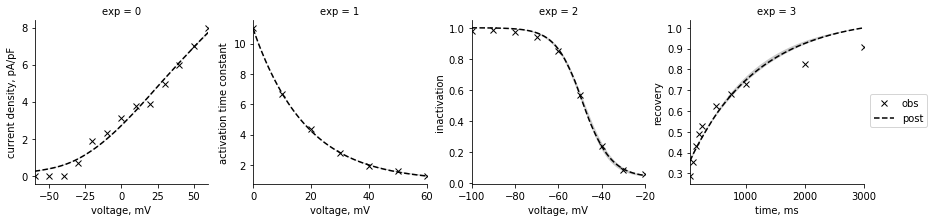

In [7]:
from visualization_custom import plot_sim_results
g = plot_sim_results(history, 'ikur', n_samples=10, obs=measurements, original=False)
xlabels = ["voltage, mV", "voltage, mV", "voltage, mV", "time, ms"]
ylabels = ["current density, pA/pF", "activation time constant", "inactivation", "recovery"]
for ax, xl in zip(g.axes.flatten(), xlabels):
    ax.set_xlabel(xl)
for ax, yl in zip(g.axes.flatten(), ylabels):
    ax.set_ylabel(yl)
plt.savefig("ikur_results.pdf", format='pdf', dpi=1000)

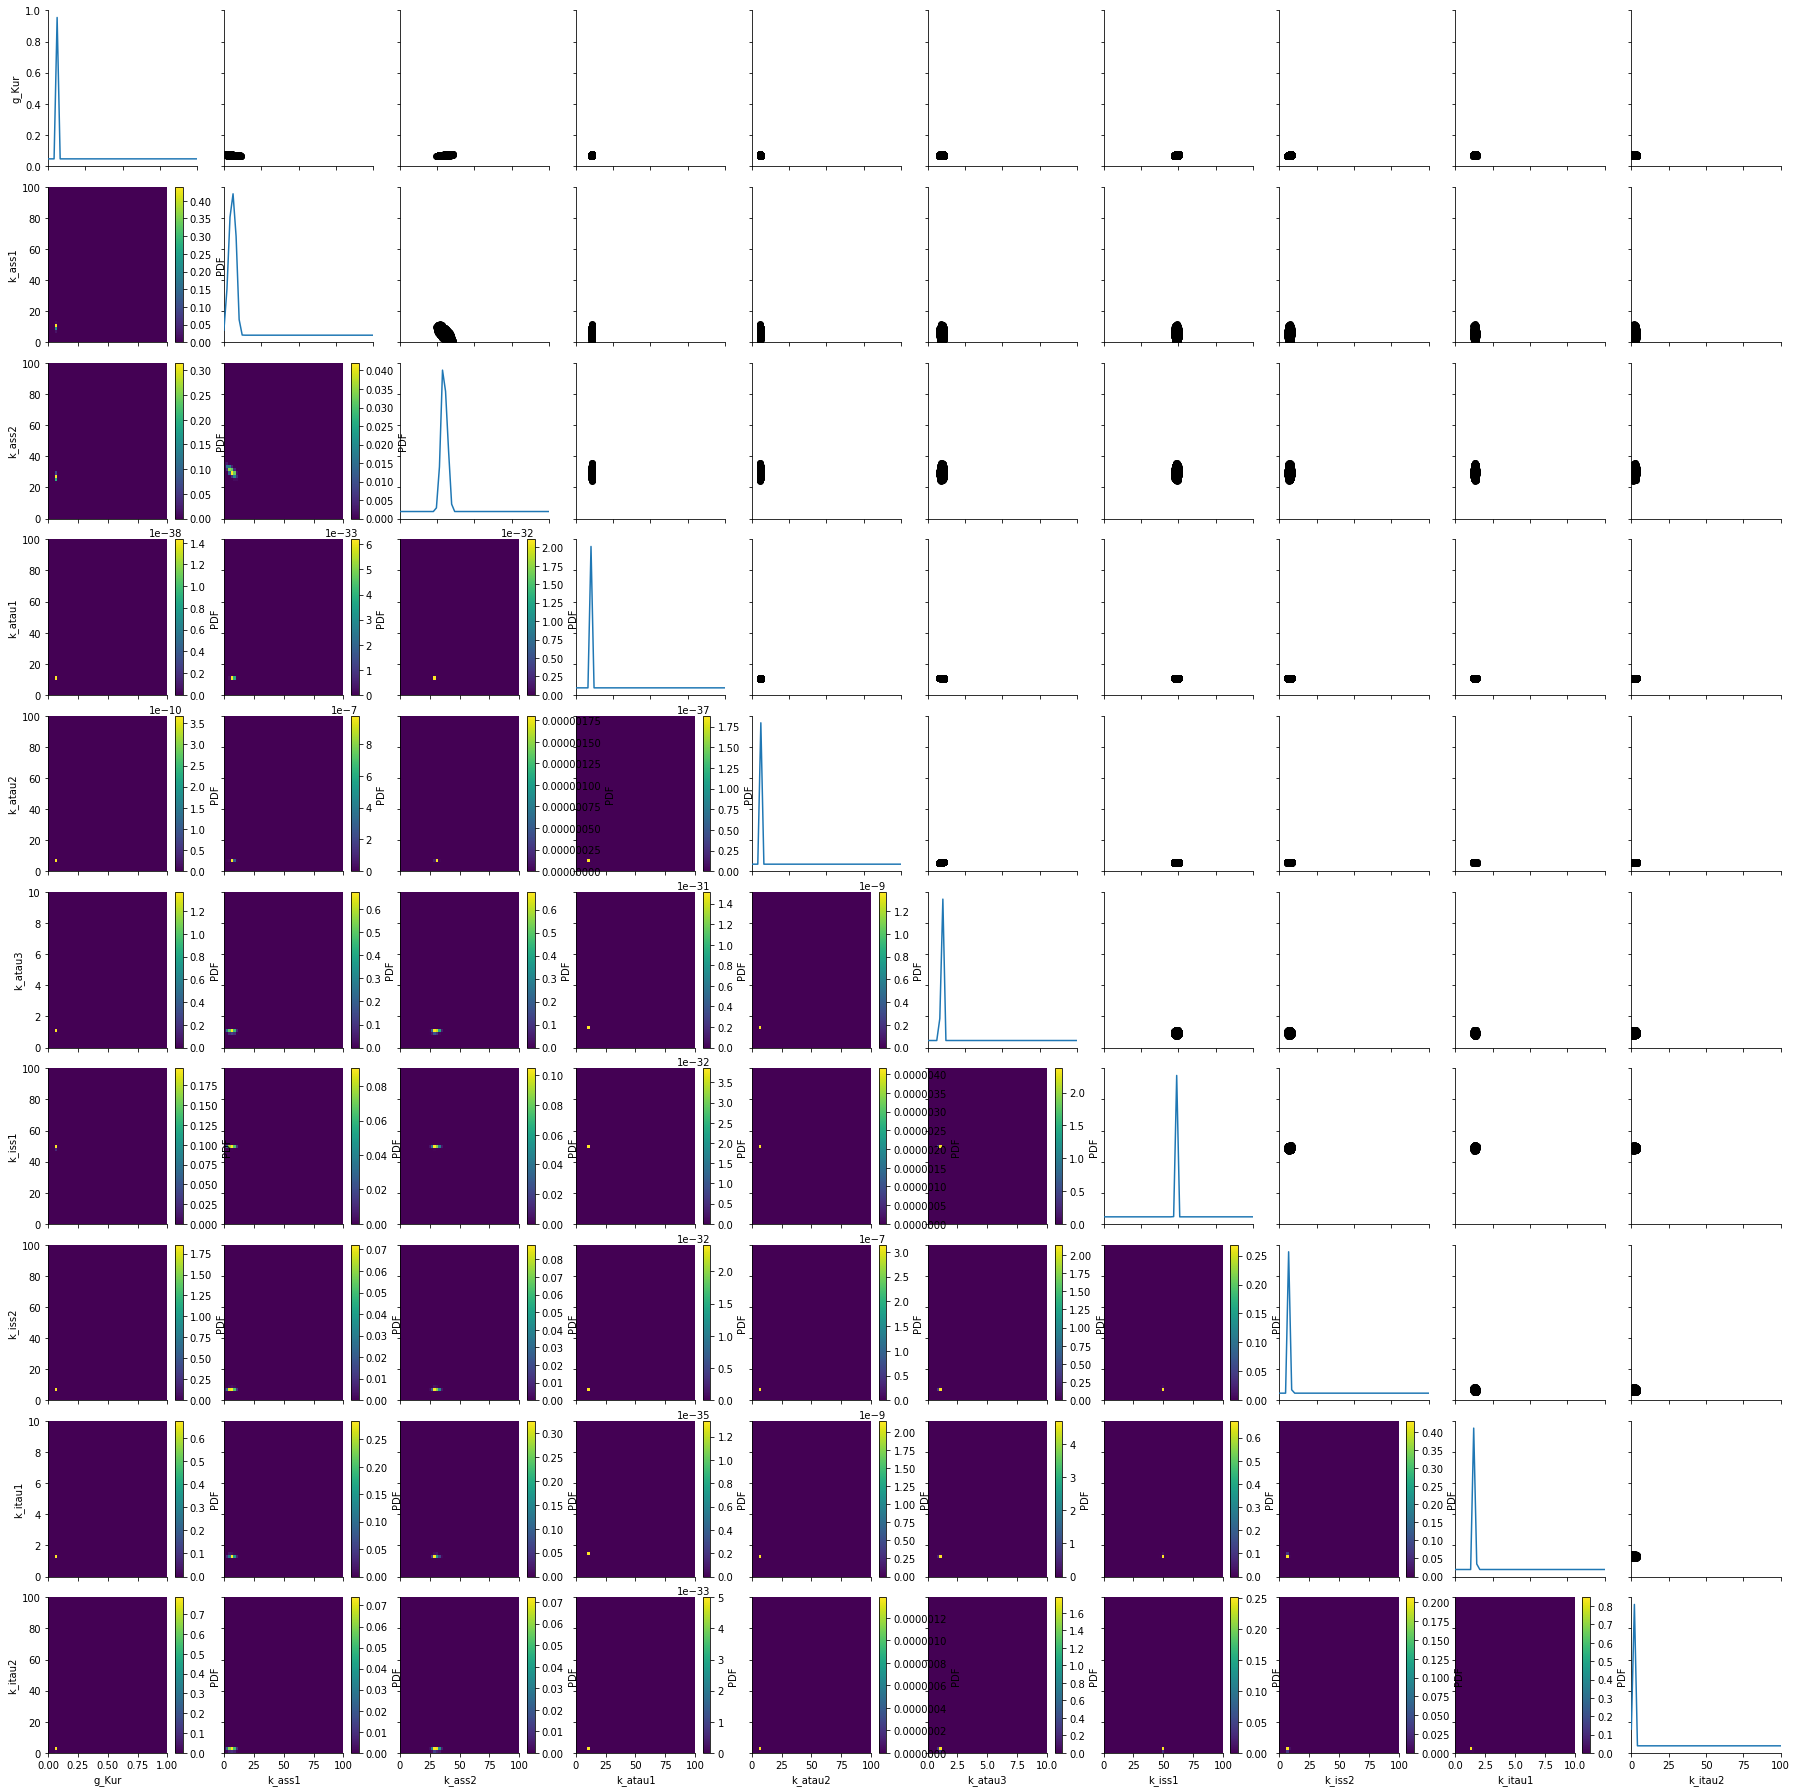

In [31]:
df, w = history.get_distribution(m=0)
plot_kde_matrix(df, w, limits=limits)

In [33]:
df, w = history.get_distribution(m=0)
df['wt'] = w
print("Mean")
for key in limits.keys():
    print(key, ":", sum(df[key] * df.wt))
print("Min")
for key in limits.keys():
    print(key, ":", min(df[key]))
print("Max")
for key in limits.keys():
    print(key, ":", max(df[key]))

Mean
g_Kur : 0.06811052472251013
k_ass1 : 5.685155227397008
k_ass2 : 29.70332971221292
k_atau1 : 10.686952821165596
k_atau2 : 5.699436052879507
k_atau3 : 0.9548384811035865
k_iss1 : 48.86470640421589
k_iss2 : 6.6719286616103135
k_itau1 : 1.3131475977501503
k_itau2 : 1.733920082108528
Min
g_Kur : 0.06152924947319012
k_ass1 : 0.0158869911813051
k_ass2 : 24.204417835179168
k_atau1 : 10.44590986103702
k_atau2 : 5.355861692037324
k_atau3 : 0.7487270843789036
k_iss1 : 47.137356386636654
k_iss2 : 5.063087605079356
k_itau1 : 1.1945080223437687
k_itau2 : 0.0013672313282558912
Max
g_Kur : 0.0761242744990582
k_ass1 : 11.644940718464829
k_ass2 : 35.63552479463469
k_atau1 : 10.90607520169215
k_atau2 : 6.000059918204549
k_atau3 : 1.1218646622905712
k_iss1 : 50.59637303327406
k_iss2 : 8.38975549787744
k_itau1 : 1.429395378821854
k_itau2 : 3.6876248913976193


run
0     AxesSubplot(0.125,0.125;0.775x0.755)
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

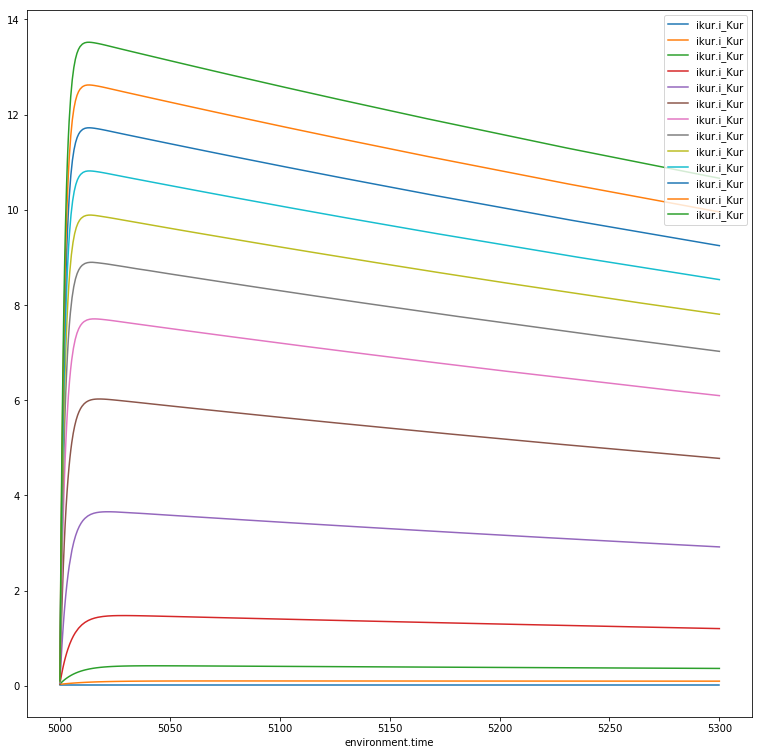

In [35]:
from pyabc_custom import simulate
out = simulate('ikur', experiment=0, logvars=['environment.time', 'ikur.i_Kur'])
fig,ax = plt.subplots(figsize=(13,13))
out.groupby("run").plot(x="environment.time", y="ikur.i_Kur",ax=ax)